In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Solution
1. Predict the profit
2. Which variable is contributing towards the profit

In [2]:
dataset = pd.read_csv('C:/Users/Sony/Desktop/Data-Science-Training/MuliLinear-Zip-Data/50_Startups.csv')

In [3]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Sepearate the Independent and Dependent Variable

In [5]:
# Independent Variable
X = dataset.iloc[ : , 0:4]

In [6]:
X.head()

R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida

In [7]:
# Depdendent Variable
y = dataset.iloc[ : , 4:5 ]

In [8]:
y.head()

Profit
0  192261.83
1  191792.06
2  191050.39
3  182901.99
4  166187.94

## Test the Assumption of Linear Regression Model

### 1. Linearity Test

scatter plot between Independent and Dependent Variable


In [9]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

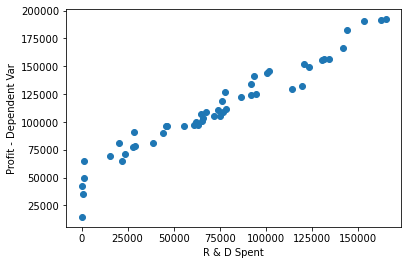

In [10]:
plt.scatter(x = X['R&D Spend'], y = y['Profit'])
plt.xlabel('R & D Spent')
plt.ylabel('Profit - Dependent Var')
plt.show()

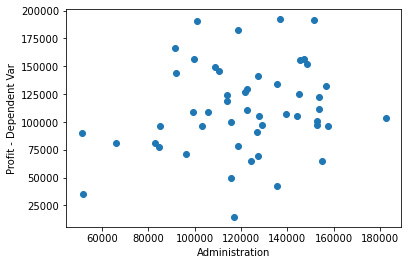

In [11]:
plt.scatter(x = X['Administration'], y = y['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit - Dependent Var')
plt.show()

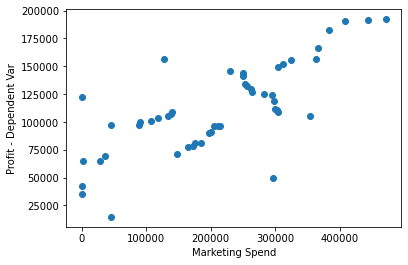

In [12]:
plt.scatter(x = X['Marketing Spend'], y = y['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit - Dependent Var')
plt.show()

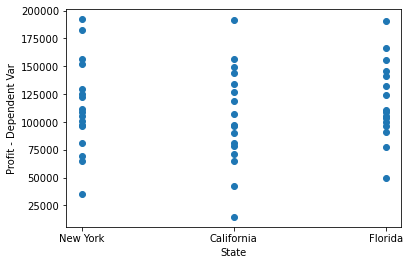

In [13]:
plt.scatter(x = X['State'], y = y['Profit'])
plt.xlabel('State')
plt.ylabel('Profit - Dependent Var')
plt.show()

In [14]:
X.head()

R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida

In [15]:
X.State.value_counts() # count the distinct/unique value in data

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [16]:
X.Administration.value_counts() # function is applicable for numerical + categorical

127382.30    1
148718.95    1
51743.15     1
153514.11    1
82982.09     1
110594.11    1
91391.77     1
129219.61    1
154806.14    1
84710.77     1
147198.87    1
96189.63     1
85047.44     1
121597.55    1
118671.85    1
51283.14     1
157693.92    1
113867.30    1
105751.03    1
153773.43    1
127320.38    1
127864.55    1
115816.21    1
101145.55    1
118546.05    1
127056.21    1
151377.59    1
145530.06    1
103057.49    1
182645.56    1
122782.75    1
124153.04    1
116983.80    1
153032.06    1
144135.98    1
145077.58    1
135495.07    1
139553.16    1
99814.71     1
114175.79    1
136897.80    1
91790.61     1
152701.92    1
108679.17    1
115641.28    1
156547.42    1
122616.84    1
65947.93     1
135426.92    1
99281.34     1
Name: Administration, dtype: int64

#### Dummy Variable

In [17]:
X_1 = pd.get_dummies(X)

In [18]:
X_1.head()

R&D Spend  Administration  Marketing Spend  State_California  \
0  165349.20       136897.80        471784.10                 0   
1  162597.70       151377.59        443898.53                 1   
2  153441.51       101145.55        407934.54                 0   
3  144372.41       118671.85        383199.62                 0   
4  142107.34        91391.77        366168.42                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

To avoid Dummy variable trap - I will drop 1 column

In [19]:
# drop a column
X_1.drop(columns=['State_California'], axis = 1, inplace=True)

In [20]:
X_1.tail()

R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
45    1000.23       124153.04          1903.93              0               1
46    1315.46       115816.21        297114.46              1               0
47       0.00       135426.92             0.00              0               0
48     542.05        51743.15             0.00              0               1
49       0.00       116983.80         45173.06              0               0

### 3. No Multicollinearity in data
1. Correlation between Indepdent Var - threshold of .85

In [21]:
corr_X1 = X_1.corr().round(2)

In [22]:
corr_X1.head()

R&D Spend  Administration  Marketing Spend  State_Florida  \
R&D Spend             1.00            0.24             0.72           0.11   
Administration        0.24            1.00            -0.03           0.01   
Marketing Spend       0.72           -0.03             1.00           0.21   
State_Florida         0.11            0.01             0.21           1.00   
State_New York        0.04            0.01            -0.03          -0.49   

                 State_New York  
R&D Spend                  0.04  
Administration             0.01  
Marketing Spend           -0.03  
State_Florida             -0.49  
State_New York             1.00

In [23]:
# To plot the correlation matrix, use the seaborn libary
import seaborn as sns

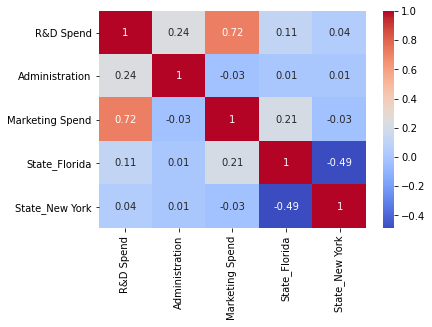

In [24]:
sns.heatmap(corr_X1, annot=True, cmap='coolwarm')
plt.show()

Feature Scaling
It is not required in case of Linear Regression

## Divide our data into Training and Test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X_1, y, test_size = 0.20, random_state = 0)

In [27]:
X_train.shape

(40, 5)

In [28]:
X_test.shape

(10, 5)

## Model Building

1. Create object of my Model Class
2. fit method and pass training data (X_train, y_trian)
3. Validate - Test my model using my test data (X_test)
4. Accuracy using X_test, y_test

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
multileRegressor = LinearRegression()

In [31]:
# pass my training data
multileRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# get the prediction
y_pred = multileRegressor.predict(X_test)

In [33]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

In [34]:
y_test_v1 = y_test.copy()

In [35]:
y_test_v1['prediction'] = y_pred

In [36]:
y_test_v1

Profit     prediction
28  103282.38  103015.201598
11  144259.40  132582.277608
10  146121.95  132447.738452
41   77798.83   71976.098513
2   191050.39  178537.482211
27  105008.31  116161.242302
38   81229.06   67851.692097
31   97483.56   98791.733747
22  110352.25  113969.435330
4   166187.94  167921.065696

In [37]:
# Check the Accuracy of my model
print("Model Accuracy is : " , multileRegressor.score(X_test, y_test) * 100)

Model Accuracy is :  93.47068473282422


In [38]:
# Check the Accuracy of my model in Training
print("Model Accuracy on Training Data is : " , multileRegressor.score(X_train, y_train) * 100)

Model Accuracy on Training Data is :  95.01847627493606


#### Model has few other parametes

In [39]:
multileRegressor.intercept_ # constant - bo

array([42554.16761773])

In [40]:
multileRegressor.coef_ # b1, b2, b3, b4, b5

array([[ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
        -9.59284160e+02,  6.99369053e+02]])

In [41]:
X_train.head()

R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
33   55493.95       103057.49        214634.81              1               0
35   46014.02        85047.44        205517.64              0               1
26   75328.87       144135.98        134050.07              1               0
34   46426.07       157693.92        210797.67              0               0
18   91749.16       114175.79        294919.57              1               0

In [43]:
# drop state of Florida and re-build my Regression model
# Since, regression model coeff shows a negative value for this column
X_train.drop(columns=['State_Florida'], axis = 1, inplace = True)
X_test.drop(columns=['State_Florida'], axis = 1, inplace = True)

C:\Users\Sony\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
X_train.head()

R&D Spend  Administration  Marketing Spend  State_New York
33   55493.95       103057.49        214634.81               0
35   46014.02        85047.44        205517.64               1
26   75328.87       144135.98        134050.07               0
34   46426.07       157693.92        210797.67               0
18   91749.16       114175.79        294919.57               0

In [45]:
# Re-build my Regression model
regressorLR_2 = LinearRegression()

In [46]:
regressorLR_2.fit(X_train, y_train) # Re-Train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regressorLR_2.predict(X_test) # Test - Predict the output

array([[103615.70496702],
       [132245.69745454],
       [133070.23906353],
       [ 72592.46097857],
       [179075.96157198],
       [116014.33808117],
       [ 67853.79186124],
       [ 98837.47482909],
       [114480.26282335],
       [168492.5864927 ]])

In [48]:
regressorLR_2.coef_

array([[7.74682581e-01, 3.18348683e-02, 3.57342438e-02, 1.05221988e+03]])

In [60]:
X_test.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [49]:
regressorLR_2.score(X_test,y_test)

0.9367033175958572

### 2 Test for Homoscedasticity

In [50]:
error = y_test - y_pred

In [51]:
error

Profit
28    267.178402
11  11677.122392
10  13674.211548
41   5822.731487
2   12512.907789
27 -11152.932302
38  13377.367903
31  -1308.173747
22  -3617.185330
4   -1733.125696

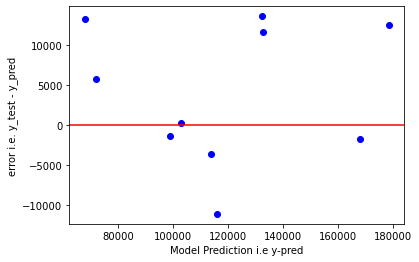

In [52]:
# plot the error
plt.plot(y_pred, error, 'bo')
plt.axhline(y = 0, color = 'red')
plt.xlabel('Model Prediction i.e y-pred')
plt.ylabel('error i.e. y_test - y_pred')
plt.show()

## 4 - Assumption of Autocorelation

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

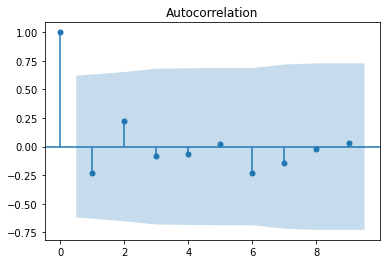

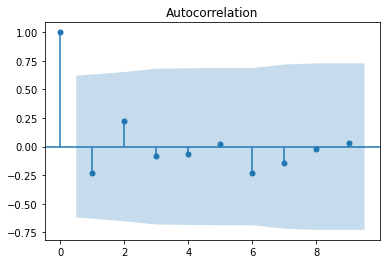

In [54]:
plot_acf(error)

In [55]:
# Durbin Watson Test - to check autocorelation
from statsmodels.api import OLS

In [56]:
OLS(endog=y_train, exog=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              843.2
Date:                Mon, 28 Sep 2020   Prob (F-statistic):                    5.02e-35
Time:                        08:46:25   Log-Likelihood:                         -432.44
No. Observations:                  40   AIC:                                      872.9
Df Residuals:                      36   BIC:                                      879.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.6836      0.067     10.206      0.000       0.548       0.819
Administration      0.3430      0.033     10.358      0.000       0.276       0.410
Marketing Spend     0.0742      0.023      3.281      0.002       0.028       0.120
State_New York   4811.4038   4211.802      1.142      0.261   -3730.526    1.34e+04
==============================================================================
Omnibus:                        2.178   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.679
Skew:                          -0.501   Prob(JB):                        0.432
Kurtosis:                       2.961   Cond. No.                     5.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
### P-value : threshold limit of 0.05

In [58]:
X_train.drop(columns=['State_New York'], axis = 1, inplace=True)
X_test.drop(columns=['State_New York'], axis = 1, inplace=True)

C:\Users\Sony\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
# Re-rerun with dropped column -state of new york
OLS(endog=y_train, exog=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1115.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):                    2.61e-36
Time:                        08:59:57   Log-Likelihood:                         -433.15
No. Observations:                  40   AIC:                                      872.3
Df Residuals:                      37   BIC:                                      877.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.6977      0.066     10.551      0.000       0.564       0.832
Administration      0.3516      0.032     10.865      0.000       0.286       0.417
Marketing Spend     0.0718      0.023      3.175      0.003       0.026       0.118
==============================================================================
Omnibus:                        1.466   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.028
Skew:                          -0.393   Prob(JB):                        0.598
Kurtosis:                       2.989   Cond. No.                         9.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durbin-Watson is less then 4 then no autocorelation with residual

### 5 Residual should be normally distributed

<AxesSubplot:>

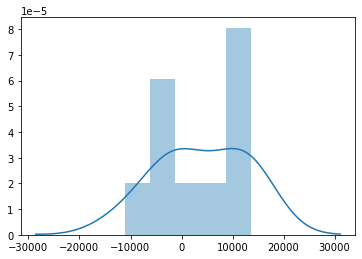

In [61]:
sns.distplot(error, bins = 5)